<a href="https://colab.research.google.com/github/WilliamSawran/ABC/blob/master/HW5_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>

<h1>Machine Learning for Recommendation Systems</h1>

<h2>1. Recommendation Systems Overview</h2>

<p style="font-family:verdana, font-size: 1em";>Recommender systems are a hot topic. Recommendation systems can be formulated as a task of matrix completion in machine learning. Recommender systems aim to predict the rating that a user will give for an item (e.g., a restaurant, a movie, a product).</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h2>2. Download The Movies Dataset</h2>

<p style="font-family:verdana, font-size: 1em";>Download the movie rating dataset from: https://www.kaggle.com/rounakbanik/themovies-
dataset. These files contain metadata for all 45,000 movies listed in the Full
MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h2>3. Building Recommendation Systems Using Surprise Recommendation System Library</h2>

<p style="font-family:verdana, font-size: 1em";>Building a small recommender system with the matrix data: “ratings.csv”. You can use the recommender system library: Surprise (http://surpriselib.com), use other recommender system libraries, or implement from scratches.</p>

<h3>A. Read data from “ratings.csv” with line format: 'userID movieID rating
timestamp'.</h3>

</body>
</html>

In [7]:
#@title Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('ratings_small.csv', sep=',', header=None, names =["userID", "movieID", "rating", "timestamp"])
df.head()

Saving ratings_small.csv to ratings_small.csv


,userID,movieID,rating,timestamp
0,userId,movieId,rating,timestamp
1,1,31,2.5,1260759144
2,1,1029,3.0,1260759179
3,1,1061,3.0,1260759182
4,1,1129,2.0,1260759185


In [8]:
#@title Install scikit-surprise
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 241kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617552 sha256=155aa1d3d0e78cb9fc87536ee83e26fc3c2629127a63c6cb0e12923a513934a6
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [9]:
#@title Import scikit-surprise libraries
#from surprise import Reader, Dataset, SVD
#from surprise.model_selection.validation import cross_validate

from surprise import Reader, Dataset, SVD, KNNBasic, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection.search import GridSearchCV
from surprise.model_selection.split import train_test_split

In [10]:
#@title Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'
# Define the format
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1) #user item rating timestamp / userID movieID rating timestamp

# Load the data from the file using the reader format
data = Dataset.load_from_file('ratings_small.csv', reader=reader)

<!DOCTYPE html>
<html>
<body>

<h3>B. Study MAE and RMSE performance metrics.</h3>

<p style="font-family:verdana, font-size: 1em";>MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation.</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>C. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation</h3>

</body>
</html>

In [11]:
#@title Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF) under the 5-folds cross-validation

# Create Probabilistic Matrix Factorization (PMF) algorithm with 5 factors
k_factors = 5
pmf = SVD(n_factors= k_factors, n_epochs= 200, biased= False, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)

'''
According to Surprise recommender-system-library documentation, 
you can implement Probabilistic Matrix Factorization (PMF)
using class:  surprise.prediction_algorithms.matrix_factorization.SVD

To implement PMF, you can choose to use an unbiased version of this 
SVD algorithm by setting the biased parameter to False. This is 
equivalent to PMF.
Source: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#unbiased-note
'''
# Run 5-fold cross-validation and print results
print("__________________________________________________________________________________________\n")
print("*** Computing the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF) ***")
print("__________________________________________________________________________________________\n\n")
results_pmf = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_pmf)
print("")

__________________________________________________________________________________________

*** Computing the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF) ***
__________________________________________________________________________________________


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0052  0.9801  0.9952  1.0049  0.9857  0.9942  0.0101  
MAE (testset)     0.7560  0.7355  0.7502  0.7605  0.7427  0.7490  0.0090  
Fit time          14.14   14.08   14.06   14.11   14.06   14.09   0.03    
Test time         0.25    0.16    0.22    0.25    0.14    0.21    0.05    
{'test_rmse': array([1.00520809, 0.98013102, 0.99516403, 1.00485297, 0.98571698]), 'test_mae': array([0.75599385, 0.73545239, 0.7502204 , 0.76050774, 0.74267651]), 'fit_time': (14.136332273483276, 14.07722544670105, 14.06187653541565, 14.11415147781372, 14.057795763015747), 'test_time': (0.2526

In [12]:
#@title Compute the average MAE and RMSE of the User based Collaborative Filtering under the 5-folds cross-validation 

# Create User-Based Collaborative Filtering algorithm
sim_options = {
    'name': 'MSD',
    'user_based': 'True'
}

# Run 5-fold cross-validation and print results
print("__________________________________________________________________________________________\n")
print("*** Computing the average MAE and RMSE of the User-Based Collaborative Filtering ***")
print("__________________________________________________________________________________________\n\n")
knnbasic__user_based_cf_algorithm = KNNBasic(sim_options = sim_options)
results_user_based_cf= cross_validate(knnbasic__user_based_cf_algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf)
print("")

__________________________________________________________________________________________

*** Computing the average MAE and RMSE of the User-Based Collaborative Filtering ***
__________________________________________________________________________________________


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9794  0.9566  0.9685  0.9690  0.9653  0.9677  0.0073  
MAE (testset)     0.7511  0.7345  0.7431  0.7453  0.7426  0.7433  0.0053  
Fit time          0.15    0.18    0.19    0.18    0.18    0.18    0.01    
Test t

In [13]:
#@title Compute the average MAE and RMSE of the Item based Collaborative Filtering under the 5-folds cross-validation

# Create User-Based Collaborative Filtering algorithm
sim_options = {
    'name': 'MSD',
    'user_based': 'False'
}

# Run 5-fold cross-validation and print results
print("__________________________________________________________________________________________\n")
print("*** Computing the average MAE and RMSE of the Item-Based Collaborative Filtering ***")
print("__________________________________________________________________________________________\n\n")
knnbasic__item_based_cf_algorithm = KNNBasic(sim_options = sim_options)
results_item_based_cf=cross_validate(knnbasic__item_based_cf_algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf)
print("")

__________________________________________________________________________________________

*** Computing the average MAE and RMSE of the Item-Based Collaborative Filtering ***
__________________________________________________________________________________________


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9626  0.9735  0.9710  0.9629  0.9677  0.9675  0.0043  
MAE (testset)     0.7429  0.7494  0.7424  0.7408  0.7434  0.7438  0.0029  
Fit time          0.19    0.18    0.18    0.18    0.20    0.19    0.01    
Test t

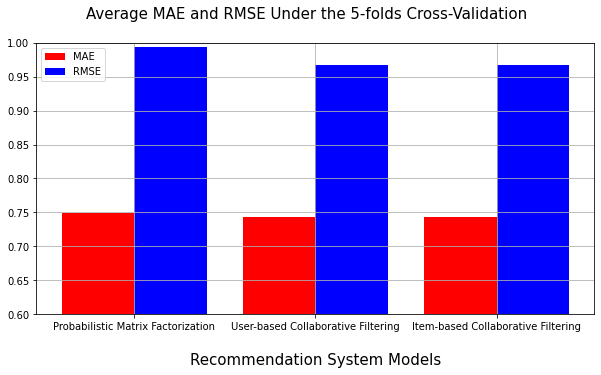

In [14]:
#@title Plot average MAE and RMSE of three recommendation systems under the 5-folds cross-validation

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(3)
y1 = [results_pmf['test_mae'].mean(), results_user_based_cf['test_mae'].mean(), results_item_based_cf['test_mae'].mean()]
y2 = [results_pmf['test_rmse'].mean(), results_user_based_cf['test_rmse'].mean(), results_item_based_cf['test_rmse'].mean()]
width = 0.4
  
# plot data in grouped manner of bar type
plt.figure(figsize=(10,5))
plt.bar(x-0.2, y1, width, color='red')
plt.bar(x+0.2, y2, width, color='blue')
plt.xticks(x, ['Probabilistic Matrix Factorization', 'User-based Collaborative Filtering', 'Item-based Collaborative Filtering'])
plt.xlabel("\nRecommendation System Models", fontsize=15)
plt.legend(["MAE", "RMSE"])
plt.suptitle('Average MAE and RMSE Under the 5-folds Cross-Validation', fontsize=15)
plt.grid(True)
plt.ylim((0.6,1.0))
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>D. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?</h3>

<p style="font-family:verdana, font-size: 1em";>When the average (mean) performances of User-based collaborative filtering, Item-based collaborative filtering, and PMF are compared with respect to RMSE measure, PMF had the highest average RMSE measure (avg RMSE 0.9942) and best performance, followed by User-based collaborative filtering (avg RMSE 0.9677) and item-based collaborative filtering (avg RMSE 0.9675) which together had lower, mutually comparable performances.</p>

<p style="font-family:verdana, font-size: 1em";>When the average (mean) performances of User-based collaborative filtering, Item-based collaborative filtering, and PMF are compared with respect to MAE measure, PMF had again the highest average MAE measure (avg MAE 0.7490) and best performance. Item-based collaborative filtering (avg MAE 0.7438) performed better than User-based collaborative filtering (avg MAE 0.7433).</p>

</body>
</html>

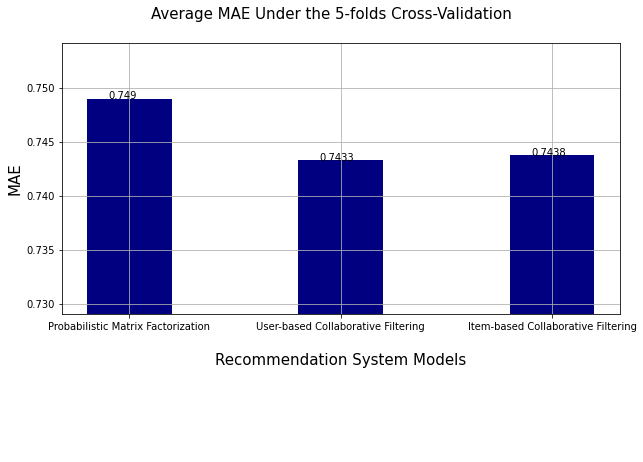

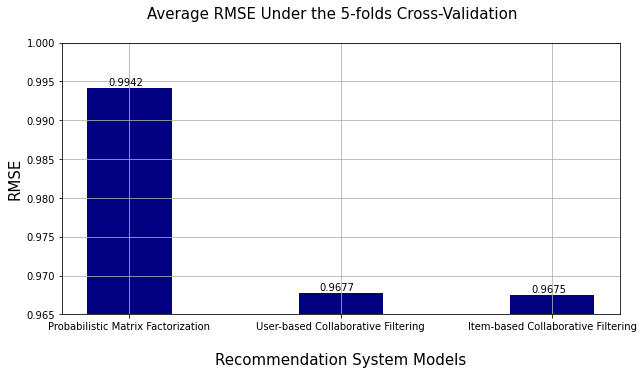

In [34]:
#@title Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
#figure(num=None, figsize=(16, 6))
#font = {'family' : 'Times New Roman',
#        'size'   : 10}

#plt.rc('font', **font)

# Defines values for the first plot
x = np.arange(3)
y1 = [results_pmf['test_mae'].mean(), results_user_based_cf['test_mae'].mean(), results_item_based_cf['test_mae'].mean()]
width = 0.4

# Defines values for the second plot
x = np.arange(3)
y2 = [results_pmf['test_rmse'].mean(), results_user_based_cf['test_rmse'].mean(), results_item_based_cf['test_rmse'].mean()]

# Draw first subplot using plt.subplot
plt.figure(figsize=(10,5))
plt.bar(x, y1, width, color='navy')
plt.xticks(x, ['Probabilistic Matrix Factorization', 'User-based Collaborative Filtering', 'Item-based Collaborative Filtering'])
plt.xlabel("\nRecommendation System Models\n\n\n\n\n", fontsize=15)
plt.ylabel("MAE", fontsize=15)
#plt.legend(["MAE", "RMSE"])
plt.suptitle('Average MAE Under the 5-folds Cross-Validation', fontsize=15)
plt.grid(True)
plt.ylim((0.7290,0.7542))
for i, v in enumerate(y1):
    plt.text(x[i] - 0.1, v + 0.00001, str(np.round(v,4)))

# Draw second subplot using plt.subplot
plt.figure(figsize=(10,5))
plt.bar(x, y2, width, color='navy')
plt.xticks(x, ['Probabilistic Matrix Factorization', 'User-based Collaborative Filtering', 'Item-based Collaborative Filtering'])
plt.xlabel("\nRecommendation System Models", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
#plt.legend(["MAE", "RMSE"])
plt.suptitle('Average RMSE Under the 5-folds Cross-Validation', fontsize=15)
plt.grid(True)
plt.ylim((0.965,1.000))
for i, v in enumerate(y2):
    plt.text(x[i] - 0.1, v + 0.0003, str(np.round(v,4)))

plt.show()
# plt.savefig('subplots with log scale.pdf', dpi=300)

<!DOCTYPE html>
<html>
<body>

<h3>E. Examine how the cosine, MSD (Mean Squared Difference), and Pearson
similarities impact the performances of User based Collaborative Filtering and
Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?</h3>

<p style="font-family:verdana, font-size: 1em";>It appears that the impact of the three metrics on User based Collaborative Filtering is more or less consistent with the impact of the three metrics on Item based Collaborative Filtering. The application of MSD similarity measure yielded lower mean RMSE and mean MAE performance for both the User based Collaborative Filtering and Item based Collaborative Filtering recommendation systems. Meanwhile, the application of cosine and Pearson similarity measures yielded higher and comparable performance for both the User based Collaborative Filtering and Item based Collaborative Filtering recommendation systems.</p>

</body>
</html>

In [19]:
#@title Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering

##########--------MSD------User Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** MSD----User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD = KNNBasic(sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD=cross_validate(algo_user_based_cf_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD)
print("")


##########--------cosine------User Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** cosine----User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_cosine = KNNBasic(sim_options = {'name':'cosine','user_based': True})
results_user_based_cf_cosine=cross_validate(algo_user_based_cf_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_cosine)
print("")

##########--------pearson------User Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** Pearson sim----User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_pearson = KNNBasic(sim_options = {'name':'pearson','user_based': True})
results_user_based_cf_pearson=cross_validate(algo_user_based_cf_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_pearson)
print("")



__________________________________________________________________________________________

********** MSD----User Based Collaborative Filtering algorithm result **********
__________________________________________________________________________________________


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9669  0.9653  0.9676  0.9657  0.9732  0.9677  0.0028  
MAE (testset)     0.7452  0.7427  0.7421  0.7447  0.7450  0.7439  0.0013  
Fit time          0.15    0.18    0.18    0.18    0.18    0.18    0.01    
Test time

In [20]:
#@title Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of Item based Collaborative Filtering

##########--------MSD------Item Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** MSD----Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD = KNNBasic(sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD=cross_validate(algo_item_based_cf_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD)
print("")


##########--------cosine------Item Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** cosine----Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_cosine = KNNBasic(sim_options = {'name':'cosine','user_based': False})
results_item_based_cf_cosine=cross_validate(algo_item_based_cf_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_cosine)
print("")

##########--------pearson------Item Based Collaborative Filtering algorithm
print('')
print("__________________________________________________________________________________________\n")
print('********** Pearson sim----Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_pearson = KNNBasic(sim_options = {'name':'pearson','user_based': False})
results_item_based_cf_pearson=cross_validate(algo_item_based_cf_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_pearson)
print("")


__________________________________________________________________________________________

********** MSD----Item Based Collaborative Filtering algorithm result **********
__________________________________________________________________________________________


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9289  0.9389  0.9385  0.9338  0.9343  0.9349  0.0036  
MAE (testset)     0.7186  0.7222  0.7245  0.7200  0.7203  0.7211  0.0020  
Fit time          4.54    4.28    4.04    4.33    4.16    4.27    0.17    
Test time

                                        RMSE       MAE
Collaborative Filtering Similarity                    
Item-based CF           Cosine      0.994841  0.774341
                        MSD         0.934865  0.721120
                        Pearson     0.989581  0.768143
User-based CF           Cosine      0.993169  0.767161
                        MSD         0.967743  0.743935
                        Pearson     0.997714  0.772418


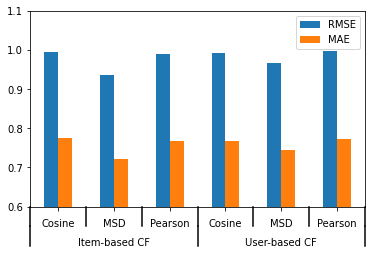

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby

def test_table():
    data_table = pd.DataFrame({'Collaborative Filtering':['User-based CF']*3 + ['Item-based CF']*3,
                               'Similarity':(['Cosine'] + ['MSD'] + ['Pearson'])*2,
                               'Error Measure':['RMSE','MAE','RMSE','MAE','RMSE','MAE'],
                               'RMSE':[results_user_based_cf_cosine['test_rmse'].mean(), 
                                       results_user_based_cf_MSD['test_rmse'].mean(),
                                       results_user_based_cf_pearson['test_rmse'].mean(),
                                       results_item_based_cf_cosine['test_rmse'].mean(), 
                                       results_item_based_cf_MSD['test_rmse'].mean(),
                                       results_item_based_cf_pearson['test_rmse'].mean()],
                               'MAE':[results_user_based_cf_cosine['test_mae'].mean(), 
                                      results_user_based_cf_MSD['test_mae'].mean(),
                                      results_user_based_cf_pearson['test_mae'].mean(),
                                      results_item_based_cf_cosine['test_mae'].mean(), 
                                      results_item_based_cf_MSD['test_mae'].mean(),
                                      results_item_based_cf_pearson['test_mae'].mean()],
                               #'Ordered':np.random.randint(0,10,8)
                               })
    #print(data_table)
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + 0.5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = test_table().groupby(['Collaborative Filtering','Similarity']).sum()
print(df)
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=False,ax=fig.gca())
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
ax.set_ylim([0.6,1.1])
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>F. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.</h3>

<p style="font-family:verdana, font-size: 1em";>Increasing the number of neighbors has a generally negative impact on performance.  Initially, as the number of neighbors increases from one to five neighbors, there is a steep decline in recommendation system performance. The performance continues to decrease as the number of neighbors increase from five to fifteen, but the rate of decrease gradually diminishes.  Beyond fifteen neighbors, there is little to modest decrease in performance.</p>

</body>
</html>

In [159]:
##########--------MSD------User Based Collaborative Filtering algorithm------5---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 5--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_5_neighbors = KNNBasic(k=5, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_5_neighbors=cross_validate(algo_user_based_cf_MSD_5_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_5_neighbors)
print("")



##########--------MSD------Item Based Collaborative Filtering algorithm------10---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 5---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_5_neighbors = KNNBasic(k=5, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_5_neighbors=cross_validate(algo_item_based_cf_MSD_5_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_5_neighbors)
print("")



##########--------MSD------User Based Collaborative Filtering algorithm------10---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 10--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_10_neighbors = KNNBasic(k=10, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_10_neighbors=cross_validate(algo_user_based_cf_MSD_10_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_10_neighbors)
print("")



##########--------MSD------Item Based Collaborative Filtering algorithm------10---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 10---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_10_neighbors = KNNBasic(k=10, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_10_neighbors=cross_validate(algo_item_based_cf_MSD_10_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_10_neighbors)
print("")


##########--------MSD------User Based Collaborative Filtering algorithm------15---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 15--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_15_neighbors = KNNBasic(k=15, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_15_neighbors=cross_validate(algo_user_based_cf_MSD_15_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_15_neighbors)
print("")


##########--------MSD------Item Based Collaborative Filtering algorithm------15---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 15---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_15_neighbors = KNNBasic(k=15, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_15_neighbors=cross_validate(algo_item_based_cf_MSD_15_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_15_neighbors)
print("")


##########--------MSD------User Based Collaborative Filtering algorithm------20---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 20--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_20_neighbors = KNNBasic(k=20, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_20_neighbors=cross_validate(algo_user_based_cf_MSD_20_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_20_neighbors)
print("")


##########--------MDS------Item Based Collaborative Filtering algorithm------20---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 20---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_20_neighbors = KNNBasic(k=20, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_20_neighbors=cross_validate(algo_item_based_cf_MSD_20_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_20_neighbors)
print("")


##########--------MSD------User Based Collaborative Filtering algorithm------25---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 25--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_25_neighbors = KNNBasic(k=25, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_25_neighbors=cross_validate(algo_user_based_cf_MSD_25_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_25_neighbors)
print("")


##########--------MDS------Item Based Collaborative Filtering algorithm------25---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 25---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_25_neighbors = KNNBasic(k=25, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_25_neighbors=cross_validate(algo_item_based_cf_MSD_25_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_25_neighbors)
print("")



##########--------MSD------User Based Collaborative Filtering algorithm------30---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 30--Neighboors--User Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_user_based_cf_MSD_30_neighbors = KNNBasic(k=30, sim_options = {'name':'MSD','user_based': True})
results_user_based_cf_MSD_30_neighbors=cross_validate(algo_user_based_cf_MSD_30_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_user_based_cf_MSD_30_neighbors)
print("")


##########--------MSD------Item Based Collaborative Filtering algorithm------30---Neighboors
print('')
print("__________________________________________________________________________________________\n")
print('********** 30---Neighboors---Item Based Collaborative Filtering algorithm result **********')
print("__________________________________________________________________________________________\n\n")
algo_item_based_cf_MSD_30_neighbors = KNNBasic(k=30, sim_options = {'name':'MSD','user_based': False})
results_item_based_cf_MSD_30_neighbors=cross_validate(algo_item_based_cf_MSD_30_neighbors, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_item_based_cf_MSD_30_neighbors)
print("")


__________________________________________________________________________________________

********** 5--Neighboors--User Based Collaborative Filtering algorithm result **********
__________________________________________________________________________________________


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9888  0.9810  0.9929  0.9811  0.9812  0.9850  0.0049  
MAE (testset)     0.7558  0.7524  0.7609  0.7531  0.7490  0.7543  0.0039  
Fit time          0.15    0.19    0.20    0.20    0.20    0.19    0.02    
T

<!DOCTYPE html>
<html>
<body>

<h3>G. Identify the best number of neighbor (denoted by K) for User/Item based
collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?</h3>

<p style="font-family:verdana, font-size: 1em";>The best number of neighbor (denoted by K) for User-based collaborative filtering in terms of RMSE is about 4 or 5.  The best number of neighbor for Item-based collaborative filtering in terms of RMSE is about 4 or 5 as well.  Thus, it seems that the best K of User-based collaborative filtering is the about same with the best K of Item-based collaborative filtering.</p>

</body>
</html>

In [49]:
print('')
print("__________________________________________________________________________________________\n")
print('****** Identify the best number of neighbors (k) for User-based CF in terms of RMSE ******')
print("__________________________________________________________________________________________\n\n")


rmse_data = {}
# Will take some time
for i in range(1,30,2):
  print("\n\n")
  if(i==1):
    print("k = " + str(i) + "\n")
    algo_user_based_cf = KNNBasic(k=i, sim_options = {'name':'MSD','user_based': True})
    results_algo_user_based_cf=cross_validate(algo_user_based_cf, data, measures=['RMSE'], cv=5, verbose=True)
    #rmse_data.append(results_algo_user_based_cf['test_rmse'].mean())
    rmse_data[i] = results_algo_user_based_cf['test_rmse'].mean()
  else:
    print("k = " + str(i-1) + "\n")
    algo_user_based_cf = KNNBasic(k=i-1, sim_options = {'name':'MSD','user_based': True})
    results_algo_user_based_cf=cross_validate(algo_user_based_cf, data, measures=['RMSE'], cv=5, verbose=True)
    #rmse_data.append(results_algo_user_based_cf['test_rmse'].mean())
    rmse_data[i-1] = results_algo_user_based_cf['test_rmse'].mean()
  print(rmse_data)



__________________________________________________________________________________________

****** Identify the best number of neighbors (k) for User-based CF in terms of RMSE ******
__________________________________________________________________________________________





k = 1

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2144  1.2066  1.2181  1.2051  1.2124  1.2113  0.0048  
Fit time          0.16    0.19    0.20    0.20    0.20    0.19    0.01    
Test time         1.04    1.01    1.33    1.03    1.03    1.09    0.1

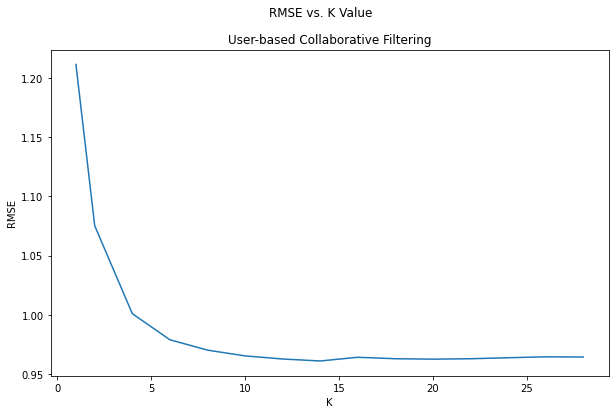

In [52]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,70), rmse_data, color='blue', linestyle=’dashed’, marker=’o’, markerfacecolor=’red’, markersize=10)
plt.plot(list(rmse_data.keys()), list(rmse_data.values()))
plt.suptitle('RMSE vs. K Value')
plt.title('User-based Collaborative Filtering')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [53]:
print('')
print("__________________________________________________________________________________________\n")
print('****** Identify the best number of neighbors (k) for Identity-based CF in terms of RMSE ******')
print("__________________________________________________________________________________________\n\n")


rmse_data_identity_based_cf = {}
# Will take some time
for i in range(1,30,2):
  print("\n\n")
  if(i==1):
    print("k = " + str(i) + "\n")
    algo_user_based_cf = KNNBasic(k=i, sim_options = {'name':'MSD','user_based': False})
    results_algo_user_based_cf=cross_validate(algo_user_based_cf, data, measures=['RMSE'], cv=5, verbose=True)
    #rmse_data.append(results_algo_user_based_cf['test_rmse'].mean())
    rmse_data_identity_based_cf[i] = results_algo_user_based_cf['test_rmse'].mean()
  else:
    print("k = " + str(i-1) + "\n")
    algo_user_based_cf = KNNBasic(k=i-1, sim_options = {'name':'MSD','user_based': False})
    results_algo_user_based_cf=cross_validate(algo_user_based_cf, data, measures=['RMSE'], cv=5, verbose=True)
    #rmse_data.append(results_algo_user_based_cf['test_rmse'].mean())
    rmse_data_identity_based_cf[i-1] = results_algo_user_based_cf['test_rmse'].mean()
  print(rmse_data_identity_based_cf)



__________________________________________________________________________________________

****** Identify the best number of neighbors (k) for Identity-based CF in terms of RMSE ******
__________________________________________________________________________________________





k = 1

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2981  1.3128  1.3081  1.3102  1.3031  1.3064  0.0053  
Fit time          7.89    9.98    4.75    4.37    4.59    6.32    2.24    
Test time         7.73    6.40    6.05    6.13    6.33    6.53   

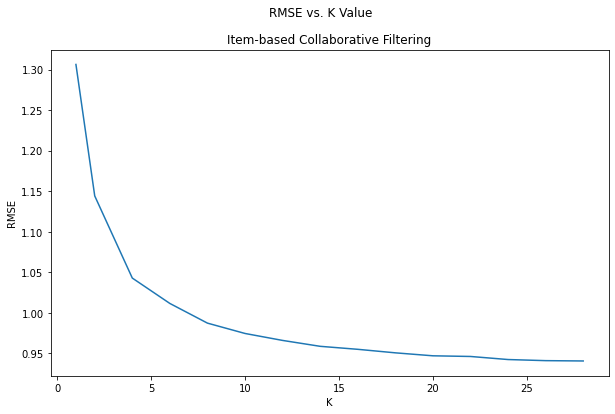

In [54]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,70), rmse_data, color='blue', linestyle=’dashed’, marker=’o’, markerfacecolor=’red’, markersize=10)
plt.plot(list(rmse_data_identity_based_cf.keys()), list(rmse_data_identity_based_cf.values()))
plt.suptitle('RMSE vs. K Value')
plt.title('Item-based Collaborative Filtering')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Additional Questions:</h3>

<h4>Approximately how many hours did you spend on this assignment?</h4>

<p style="font-family:verdana, font-size: 1em";>I spent approximately 11-12 hours on the assignment</p>

<h4>Which aspects of this assignment did you find most challenging? Were there any significant stumbling blocks?</h4>

<p style="font-family:verdana, font-size: 1em";>Overall, the assignment was relatively straightforward compared to previous homework assignments. There were a few stumbling blocks along the way, but they were not significant stumbling blocks.  For example, there were no models in Surprise library package that were explicitly called probabilistic matrix factorization (PMF), user-based collaborative filtering or item-based collaborative filtering.  Thus, I had to do some reading and research before I ascertertained that I needed to use the SVD model for the PMF model or one of the KNN-based models for the user-based collaborative filtering and item-based collaborative filtering models.  Even thereafter, I wasn't sure which KNN-based model I needed to use until I studied the class notes and carefully looked at the Surprise library package documentation.</p>

<h4>Which aspects of this assignment did you find most challenging? Were there any significant stumbling blocks?</h4>

<p style="font-family:verdana, font-size: 1em";>Once I learned which models in the Surprise libary package I needed to use to create the recommendation systems, I appreciated that the Surprise library package made it very easy to implement the different recommendation systems.  After implementing the recommendation systems, it was interesting to explore the effects of using different similarity measures and nearest neighbors on recommendation system performance.</p>

</body>
</html>